In [1]:
import numpy as np
import matplotlib.pyplot as plt
import connection_length as cnc
from importlib import reload
import matplotlib.image as mpimg

In [242]:
reload(cnc)

<module 'connection_length' from '/turquoise/users/giannis_kx/python_pixie/connection_length.py'>

Storing and reading coordinate arrays

In [92]:
cnc.store_coordinate_arrays("/net/scratch4/giannis_kx/pixie3d/iter/int_kink/11/11_new_visc.scratch/")

In [243]:
X,Z,Psi = cnc.read_coordinates("/net/scratch4/giannis_kx/pixie3d/iter/int_kink/11/11_new_visc.scratch/")

### Read boundary file

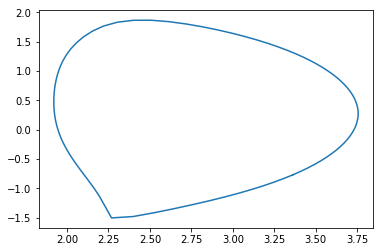

In [99]:
xbnd = []
zbnd = []
bnd_f = open("/net/scratch3/giannis_kx/FTLE/11_t331/conn/SN_fr_11_sh_bdry.txt")
next(bnd_f)
for columns in (raw.strip().split() for raw in bnd_f):
    xbnd.append(float(columns[0]))
    zbnd.append(float(columns[1]))
bnd_f.close()
plt.plot(xbnd,zbnd)
plt.show()

# Lyapunov Exponent at t=331 of (1,1) kink

Poincare Plot

In [74]:
img1 = mpimg.imread("/net/scratch4/giannis_kx/pixie3d/iter/int_kink/11/11_new_visc.scratch/img0034.png")

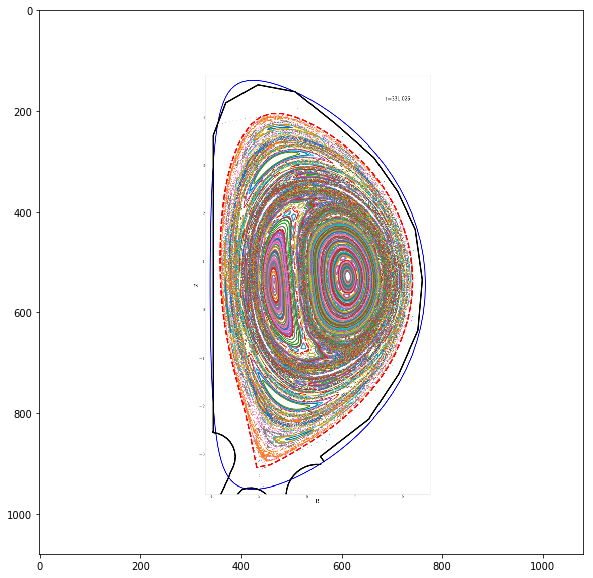

In [75]:
plt.figure(figsize=(10,10))
plt.imshow(img1)
plt.show()

In [76]:
le_path = "/net/scratch3/giannis_kx/FTLE/11_t331/ftle/"

In [77]:
A = np.load(le_path+"raw_11_t331.sav.npz_giri_2.py.npz")

In [78]:
for k in A.iterkeys():
    print(k)

giri
rr
th
hamilt_matrix
Lyap_exp


In [10]:
rs = A['rr']
us = A['th']
LE = A['Lyap_exp']

In [45]:
X_int,Z_int,Psi_int = cnc.interpolate(X,Z,Psi)

Transforming coordinates from logical to real space

In [244]:
def x_array(rs,us):
    X = []
    for r in rs:
        for u in us:
            X.append(X_int((r,u,0)))
    X = np.reshape(X,(rs.shape[0],us.shape[0]))
    return X

In [96]:
us.shape[0]

200

In [97]:
xs = x_array(rs,us)

In [245]:
def z_array(rs,us):
    Z = []
    for r in rs:
        for u in us:
            Z.append(Z_int((r,u,0)))
    Z = np.reshape(Z,(rs.shape[0],us.shape[0]))
    return Z

In [99]:
zs = z_array(rs,us)

Contour Plots of FTLE with and without filling

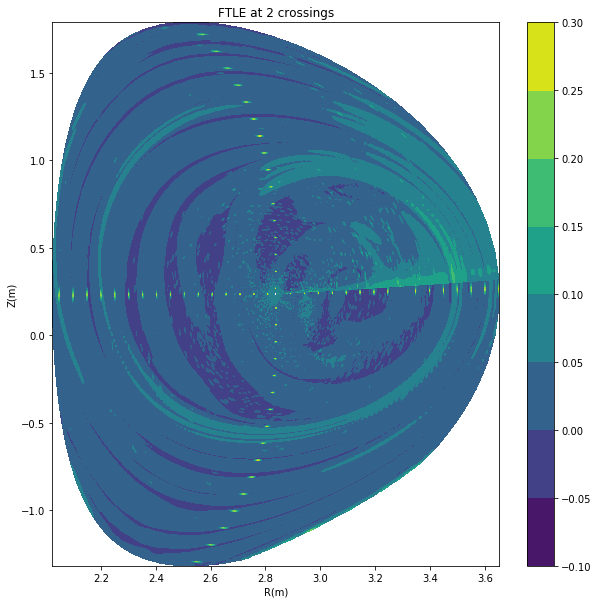

In [100]:
plt.figure(figsize=(10,10))
plt.title("FTLE at 2 crossings")
plt.contourf(xs,zs,np.swapaxes(LE,0,1))
plt.xlabel('R(m)')
plt.ylabel('Z(m)')
plt.colorbar()
plt.show()

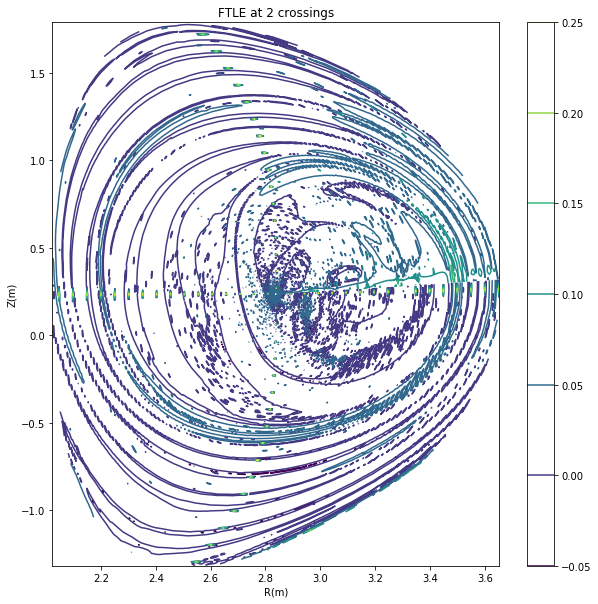

In [101]:
plt.figure(figsize=(10,10))
plt.title("FTLE at 2 crossings")
plt.contour(xs,zs,np.swapaxes(LE,0,1))
plt.xlabel('R(m)')
plt.ylabel('Z(m)')
plt.colorbar()
plt.show()

# Connection Lengths (max = 175 Km) at t=331 (NEMATO failed after 13 hrs)

In [19]:
reload(cnc)

<module 'connection_length' from '/turquoise/users/giannis_kx/python_pixie/connection_length.py'>

In [20]:
cn_path2 = "/net/scratch3/giannis_kx/FTLE/11_t331/conn/"

In [21]:
xs3,zs3,conn3 = cnc.read_connection_lengths(cn_path2,512)

Number of initial conditions finished of the initial 400 x 200

In [22]:
len(xs3)

624

Normalization number that is used by NEMATO

In [2]:
norm = 2.18

Contour Plot of unstructured data

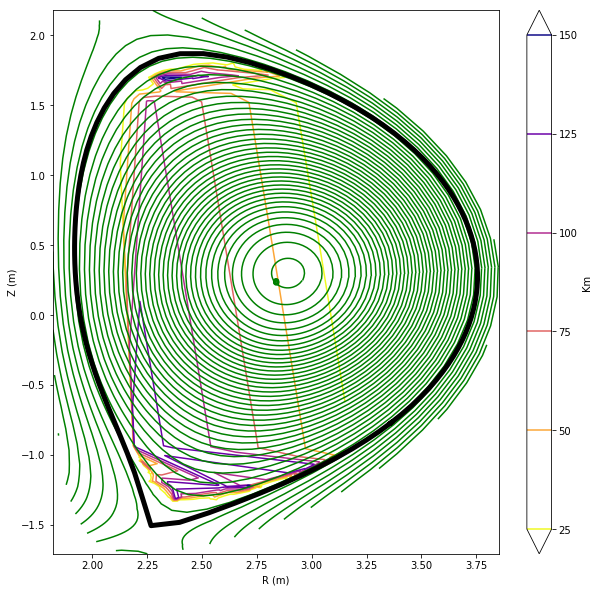

In [102]:
plt.figure(figsize=(10,10))
cs = plt.tricontour(xs3,zs3,[(c*norm)/1000 for c in conn3],cmap='plasma_r',extend='both')
#cs.cmap.set_over('k')
#cs.cmap.set_under('y')
plt.xlabel('R (m)')
plt.ylabel('Z (m)')
cbar = plt.colorbar()
cbar.ax.set_ylabel("Km")
plt.contour(X[:,:,0],Z[:,:,0],Psi[:,:,0],60, colors='green')
plt.plot(xbnd,zbnd,'k-',linewidth=5)
#plt.xlim(1.75,4.0)
plt.show()

Simple Density Plot of the connection lengths

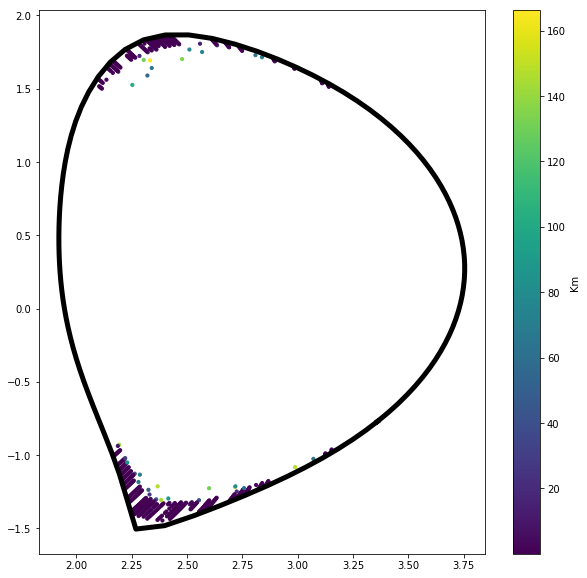

In [105]:
plt.figure(figsize=(10,10))
plt.scatter(xs3,zs3,c=[(c*norm)/1000 for c in conn3],s=10)
cbar = plt.colorbar()
cbar.ax.set_ylabel("Km")
plt.plot(xbnd,zbnd,'k-',linewidth=5)
plt.show()

# Connection Lengths (max = 10.9 Km) at t=365

In [33]:
reload(cnc)

<module 'connection_length' from '/turquoise/users/giannis_kx/python_pixie/connection_length.py'>

In [34]:
img2 = mpimg.imread("/net/scratch4/giannis_kx/pixie3d/iter/int_kink/11/11_new_visc.scratch/img0038.png")

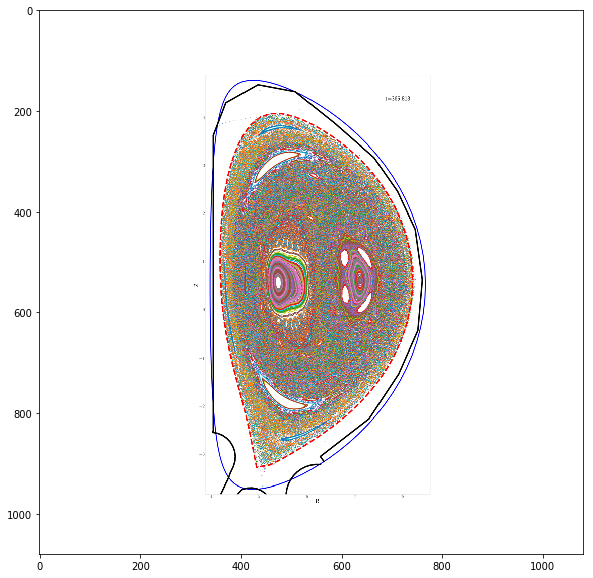

In [35]:
plt.figure(figsize=(10,10))
plt.imshow(img2)
plt.show()

In [36]:
cn_path = "/net/scratch3/giannis_kx/FTLE/11_t365/conn/"

In [37]:
xs2,zs2,conn2 = cnc.read_connection_lengths(cn_path,512)

Contour Plot of unstructured data

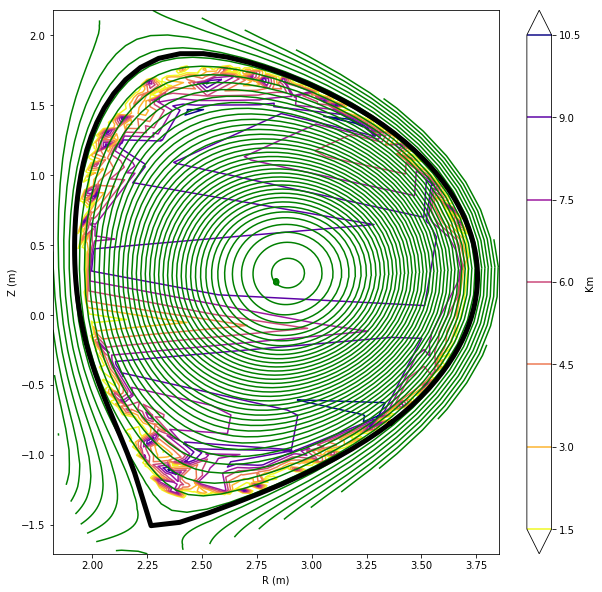

In [106]:
plt.figure(figsize=(10,10))
cs = plt.tricontour(xs2,zs2,[(c*norm)/1000 for c in conn2],cmap='plasma_r',extend='both')
#cs.cmap.set_over('k')
#cs.cmap.set_under('y')
plt.xlabel('R (m)')
plt.ylabel('Z (m)')
cbar = plt.colorbar()
cbar.ax.set_ylabel("Km")
plt.contour(X[:,:,0],Z[:,:,0],Psi[:,:,0],60, colors='green')
plt.plot(xbnd,zbnd,'k-',linewidth=5)
#plt.xlim(1.75,4.0)
plt.show()

Number of initial conditions that finished, out of $10^4$

In [39]:
len(xs2)

616

Density plot

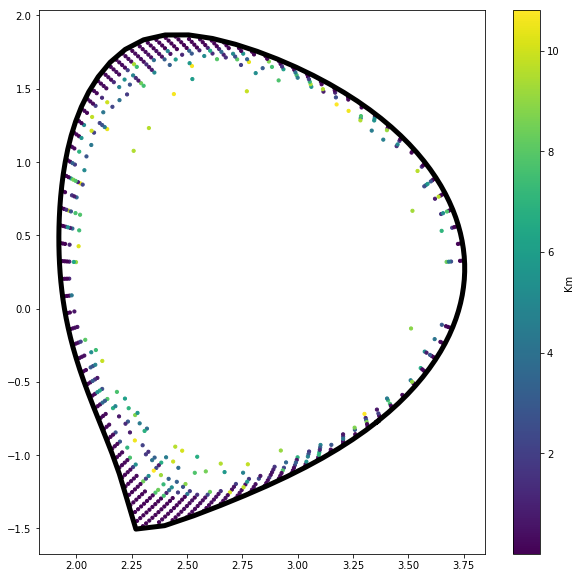

In [107]:
plt.figure(figsize=(10,10))
plt.scatter(xs2,zs2,c=[(c*norm)/1000 for c in conn2],s=10)
cbar = plt.colorbar()
cbar.ax.set_ylabel("Km")
plt.plot(xbnd,zbnd,'k-',linewidth=5)
plt.show()

## Lyapunov Exponent at t=365

In [246]:
le_path2 = "/net/scratch3/giannis_kx/FTLE/11_t365/ftle/"

In [247]:
A2 = np.load(le_path2+"raw_11_t365.sav.npz_giri_2.py.npz")

In [248]:
rs2 = A2['rr']
us2 = A2['th']
LE2 = A2['Lyap_exp']

In [249]:
xs4 = x_array(rs2,us2)
zs4 = z_array(rs2,us2)

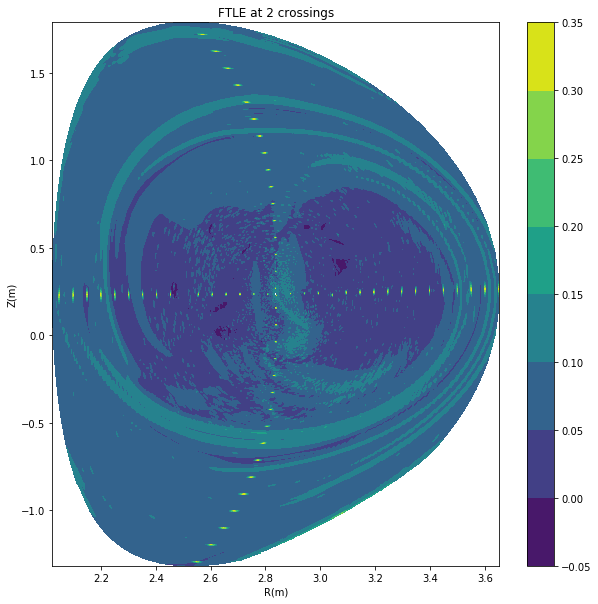

In [250]:
plt.figure(figsize=(10,10))
plt.title("FTLE at 2 crossings")
plt.contourf(xs4,zs4,np.swapaxes(LE2,0,1))
plt.xlabel('R(m)')
plt.ylabel('Z(m)')
plt.colorbar()
plt.show()

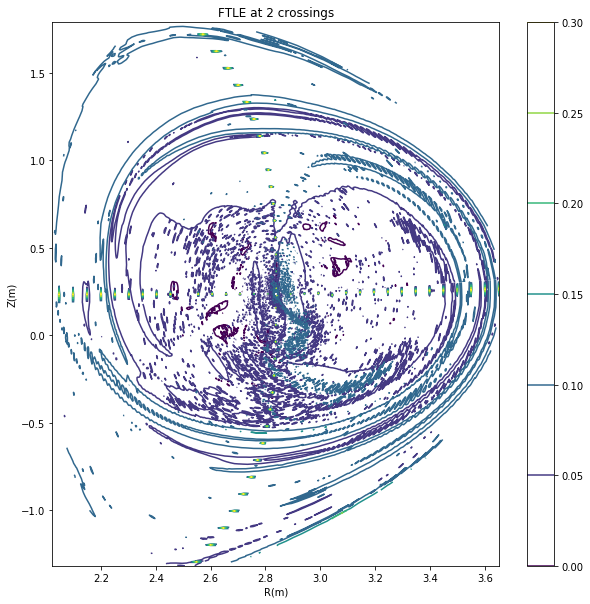

In [251]:
plt.figure(figsize=(10,10))
plt.title("FTLE at 2 crossings")
plt.contour(xs4,zs4,np.swapaxes(LE2,0,1))
plt.xlabel('R(m)')
plt.ylabel('Z(m)')
plt.colorbar()
plt.show()

## Plotting with node arrays

Reading node arrays

In [49]:
import h5py
f = h5py.File("/net/scratch4/giannis_kx/pixie3d/iter/int_kink/11/11_new_visc.scratch/"+'pixie3d.h5','r')
timesteps = list(f.keys())
variables = list(f[timesteps[0]].keys())
node_var = list(f[timesteps[0]][variables[6]].keys())
Xn = np.asarray(f[timesteps[0]][variables[6]][node_var[0]])
Yn = np.asarray(f[timesteps[0]][variables[6]][node_var[1]])
Zn = np.asarray(f[timesteps[0]][variables[6]][node_var[2]])
Xn = np.swapaxes(Xn,0,2)
Zn = np.swapaxes(Zn,0,2)

Interpolate node arrays

In [50]:
from scipy.interpolate import RegularGridInterpolator

r_grid = np.linspace(0.0,1.0,num=Xn.shape[0])
theta_grid = np.linspace(0.0,2.*np.pi,num=Xn.shape[1])
phi_grid = np.linspace(0.0,2.*np.pi,num=Xn.shape[2])

Xn_int = RegularGridInterpolator((r_grid,theta_grid,phi_grid), Xn[:,:,:], method='linear', bounds_error=False, fill_value = 0)
Zn_int = RegularGridInterpolator((r_grid,theta_grid,phi_grid), Zn[:,:,:], method='linear', bounds_error=False, fill_value = 0)


Project r,$\theta$ from logical space to real space using node coordinate arrays

In [51]:
def xn_array(rs,us):
    X = []
    for r in rs:
        for u in us:
            X.append(Xn_int((r,u,0)))
    X = np.reshape(X,(rs.shape[0],us.shape[0]))
    return X

In [52]:
def zn_array(rs,us):
    Z = []
    for r in rs:
        for u in us:
            Z.append(Zn_int((r,u,0)))
    Z = np.reshape(Z,(rs.shape[0],us.shape[0]))
    return Z

In [117]:
xns = xn_array(rs,us)
zns = zn_array(rs,us)

Plotting Lyapunov Exponent at t=331 using the node array coordinates

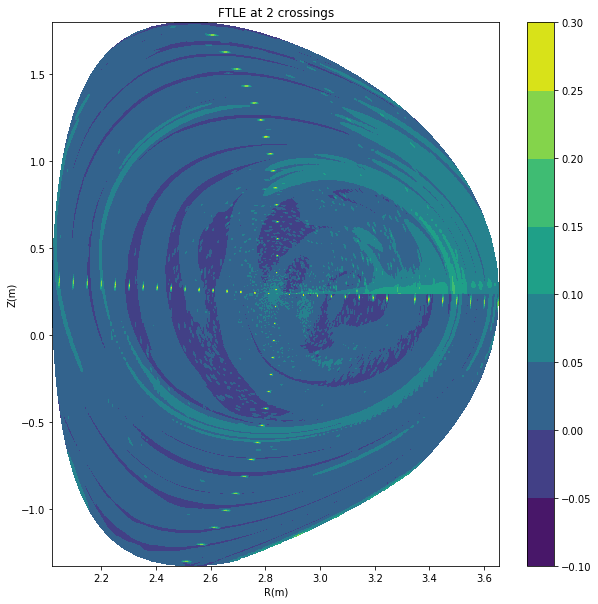

In [118]:
plt.figure(figsize=(10,10))
plt.title("FTLE at 2 crossings")
plt.contourf(xns,zns,np.swapaxes(LE,0,1))
plt.xlabel('R(m)')
plt.ylabel('Z(m)')
plt.colorbar()
plt.show()

### Observations:

1) In the plots that I used the cell coordinate arrays, I also enforced periodicity at the coordinate arrays X and Z.   
2) Node-based plots and cell-based with enforced periodicity are the same.  
3) The Lyapunov exponent field is NOT periodic at the gap.  

## Observations Regarding the Metric Tensor

1) In Giovanni's code, the metric tensor is given in an r,$\theta$ array that spans the range of these coordinates, i.e., $r \in [0.0001,1], \theta \in [0.0001,2\pi]$. (I need to avoid the singularity). It then gets interpolated and the interpolation is used. I guess that the difference of cell and node based in this context is the $r,\theta$ location of the original entries of the array. To clarify which is which, I assume that node-centered means defining the value ON $1$ and ON $2\pi$. I recalculated the metric tensor leaving out the singular point. By avoiding the singularity, all points of the metric tensor were defined a little bit off. I don't know if this is important since the code interpolates.

## New metric with periodic elements

In [236]:
le_path2 = "/net/scratch3/giannis_kx/FTLE/11_t365/ftle/"

In [237]:
A2 = np.load(le_path2+"raw_11_t365.sav.npz_giri_2.py.npz")

In [238]:
rs2 = A2['rr']
us2 = A2['th']
LE2 = A2['Lyap_exp']

In [239]:
xs4 = x_array(rs2,us2)
zs4 = z_array(rs2,us2)

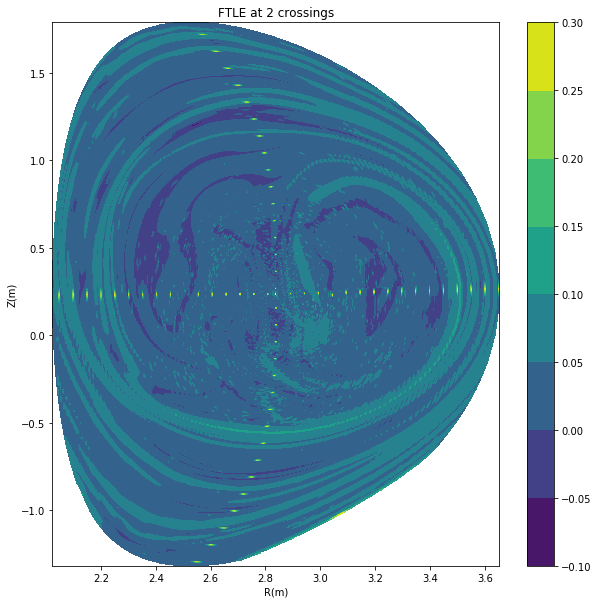

In [240]:
plt.figure(figsize=(10,10))
plt.title("FTLE at 2 crossings")
plt.contourf(xs4,zs4,np.swapaxes(LE2,0,1))
plt.xlabel('R(m)')
plt.ylabel('Z(m)')
plt.colorbar()
plt.show()

## New FTLE for t=365 with node-based metric 

In [53]:
A3 = np.load(le_path2+"raw_11_t365.sav.npz_giri_2.py.npz")

In [85]:
rs3 = A3['rr']
us3 = A3['th']
LE3 = A3['Lyap_exp']

In [55]:
xscell = x_array(rs3,us3)
zscell = z_array(rs3,us3)

In [56]:
xsnode = xn_array(rs3,us3)
zsnode = zn_array(rs3,us3)

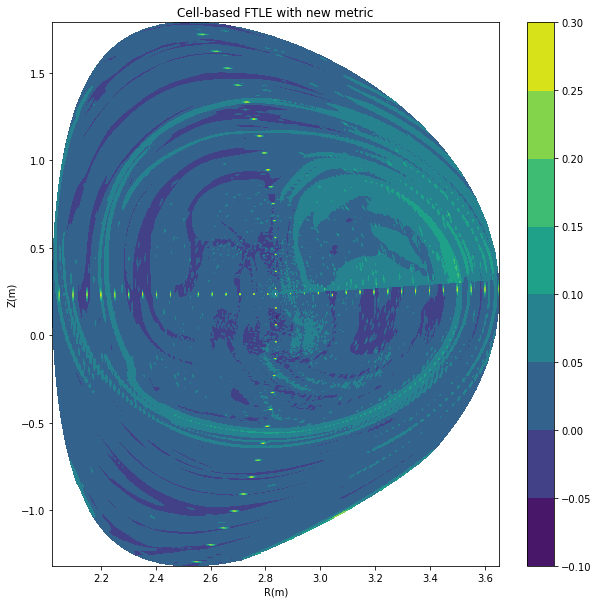

In [57]:
plt.figure(figsize=(10,10))
plt.title("Cell-based FTLE with new metric")
plt.contourf(xscell,zscell,np.swapaxes(LE3,0,1))
plt.xlabel('R(m)')
plt.ylabel('Z(m)')
plt.colorbar()
plt.show()

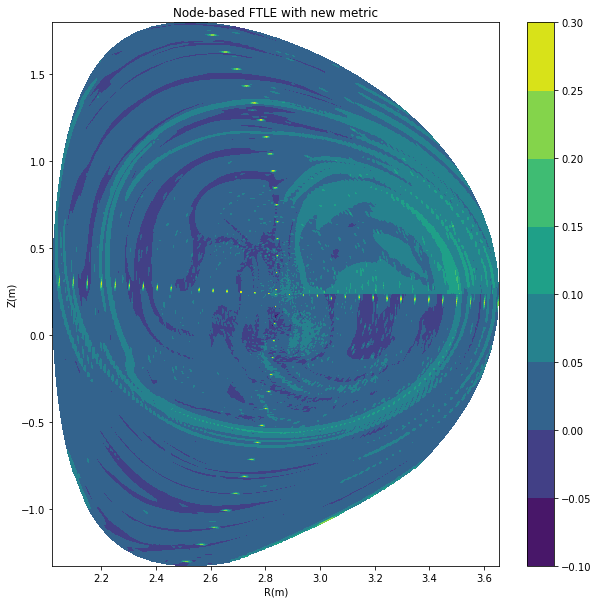

In [58]:
plt.figure(figsize=(10,10))
plt.title("Node-based FTLE with new metric")
plt.contourf(xsnode,zsnode,np.swapaxes(LE3,0,1))
plt.xlabel('R(m)')
plt.ylabel('Z(m)')
plt.colorbar()
plt.show()

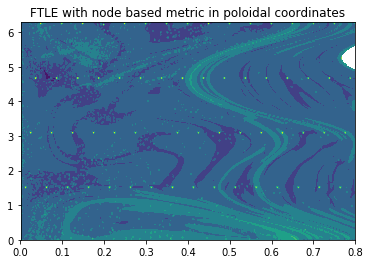

In [59]:
plt.title('FTLE with node based metric in poloidal coordinates')
plt.contourf(rs3,us3,LE3)
plt.show()

## Observations

It looks like the metric tensor being based on nodes didn't change anything regarding the periodicity of the FTLE field near the origin.

## Try to fix periodicity in the Lyap Exp array

In [60]:
LE3.shape

(200, 400)

In [63]:
def periodicity_LE(arr):
    #fixing periodicity in theta
    arr_new = np.zeros((arr.shape[0],arr.shape[1]+1), dtype = arr.dtype)
    arr_new[0:arr.shape[0],0:arr.shape[1]] = arr
    arr_new[:,-1] = arr[:,0]
    return arr_new

In [93]:
LE_p = periodicity_LE(np.swapaxes(LE3,0,1))

In [94]:
LE_p.shape

(400, 201)

In [89]:
us_p = np.append(us3,us3[0])

In [90]:
us_p[-1]

0.001

In [91]:
xscp = x_array(rs3,us_p)
zscp = z_array(rs3,us_p)

In [92]:
xsnp = xn_array(rs3,us_p)
zsnp = zn_array(rs3,us_p)

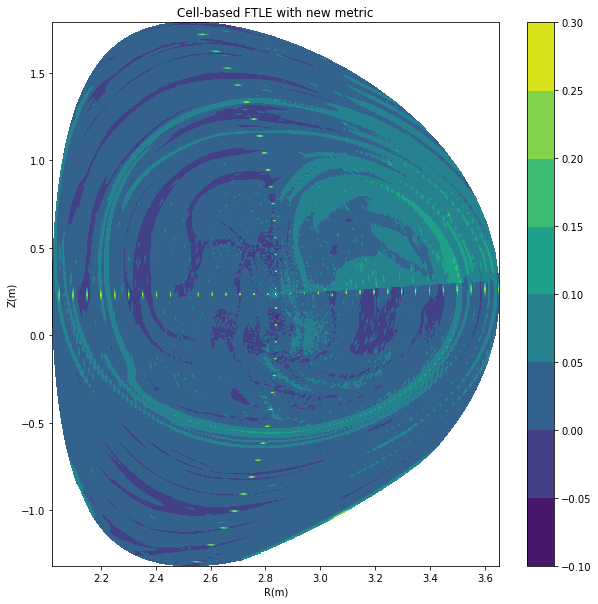

In [97]:
plt.figure(figsize=(10,10))
plt.title("Cell-based FTLE with new metric")
plt.contourf(xscp,zscp,LE_p)
plt.xlabel('R(m)')
plt.ylabel('Z(m)')
plt.colorbar()
plt.show()

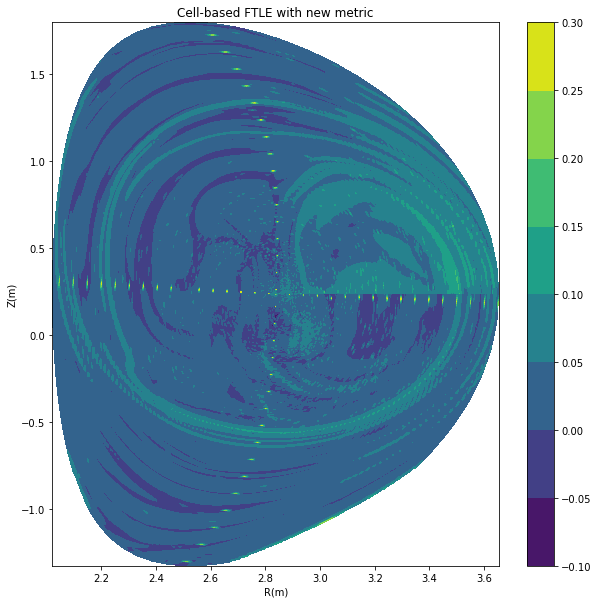

In [98]:
plt.figure(figsize=(10,10))
plt.title("Cell-based FTLE with new metric")
plt.contourf(xsnp,zsnp,LE_p)
plt.xlabel('R(m)')
plt.ylabel('Z(m)')
plt.colorbar()
plt.show()

## Connection Lengths for t=365 for uncoersened boundary

In [104]:
cn_path5 = "/net/scratch3/giannis_kx/FTLE/11_t365/conn_uncoerse/"

In [133]:
xs5,zs5,conn5 = cnc.read_connection_lengths(cn_path5,512)

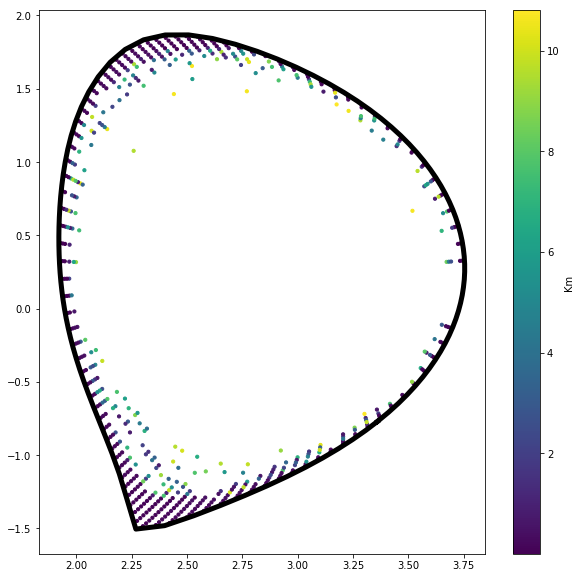

In [134]:
plt.figure(figsize=(10,10))
plt.scatter(xs5,zs5,c=[(c*norm)/1000 for c in conn5],s=10)
cbar = plt.colorbar()
cbar.ax.set_ylabel("Km")
plt.plot(xbnd,zbnd,'k-',linewidth=5)
plt.show()

## Create boundary file

In [132]:
# definition of parameters
Ro = 6.219577546
Zo = 0.5143555944
alpha = 2.24
kappa = 1.90
delta = 0.6
zeta = 0.06

In [146]:
def boundary(r,theta):
    R = Ro + r*np.cos(theta + np.arcsin(delta*np.sin(theta)))
    Z = Zo + r*kappa*np.sin(theta + zeta*np.sin(2*theta))
    return R,Z

In [149]:
theta_list = np.linspace(0,2*np.pi,100)
R_newbndry = []
Z_newbndry = []
for u in theta_list:
    R,Z = boundary(0.5,u)
    R_newbndry.append(R/norm)
    Z_newbndry.append(Z/norm)

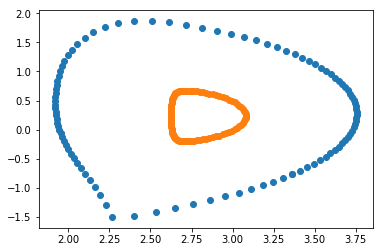

In [153]:
plt.scatter(xbnd,zbnd)
plt.scatter(R_newbndry,Z_newbndry)
plt.show()

In [131]:
nbf = open("/net/scratch3/giannis_kx/FTLE/11_t365/conn_nbdry/new_bdry.txt","w")
nbf.write(str(len(R_newbndry))+"\n")
for ind in range(len(R_newbndry)):
    nbf.write(str(R_newbndry[ind])+"\t"+str(Z_newbndry[ind])+"\n")
nbf.close()

## Connection lengths with above boundary file

In [223]:
cn_path6 = "/net/scratch3/giannis_kx/FTLE/11_t365/conn_nbdry/"

In [224]:
xs6,zs6,conn6 = cnc.read_connection_lengths(cn_path6,512)

In [225]:
len(xs6)

2074

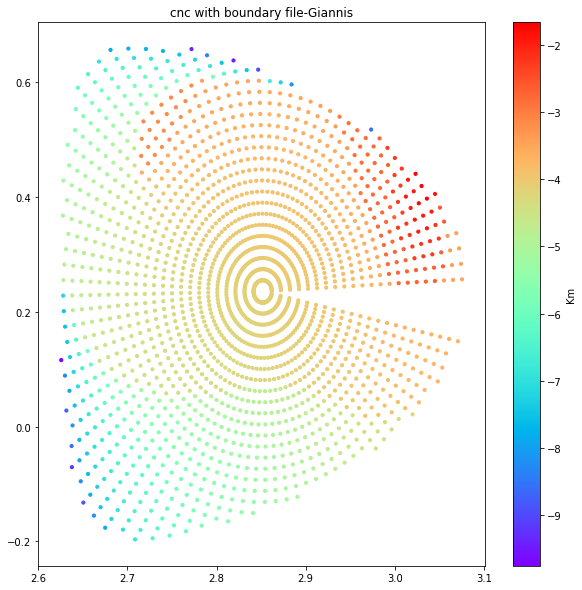

In [228]:
plt.figure(figsize=(10,10))
plt.title("cnc with boundary file-Giannis")
plt.scatter(xs6,zs6,c=np.log([(c*norm)/1000 for c in conn6]),s=10,cmap='rainbow')
cbar = plt.colorbar()
cbar.ax.set_ylabel("Km")
#plt.plot(xbnd,zbnd,'k-',linewidth=5)
plt.show()

## Lyap Exp at t=365 with new metric

In [137]:
A4 = np.load(le_path2+"raw_11_t365.sav.npz_giri_2.py.npz")

In [138]:
rs7 = A4['rr']
us7 = A4['th']
LE7 = A4['Lyap_exp']

In [139]:
xsc7 = x_array(rs7,us7)
zsc7 = z_array(rs7,us7)

In [140]:
xsn7 = xn_array(rs7,us7)
zsn7 = zn_array(rs7,us7)

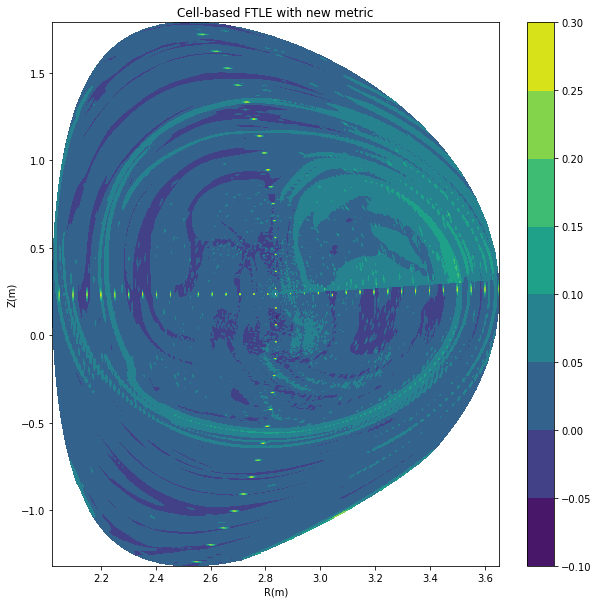

In [141]:
plt.figure(figsize=(10,10))
plt.title("Cell-based FTLE with new metric")
plt.contourf(xsc7,zsc7,np.swapaxes(LE7,0,1))
plt.xlabel('R(m)')
plt.ylabel('Z(m)')
plt.colorbar()
plt.show()

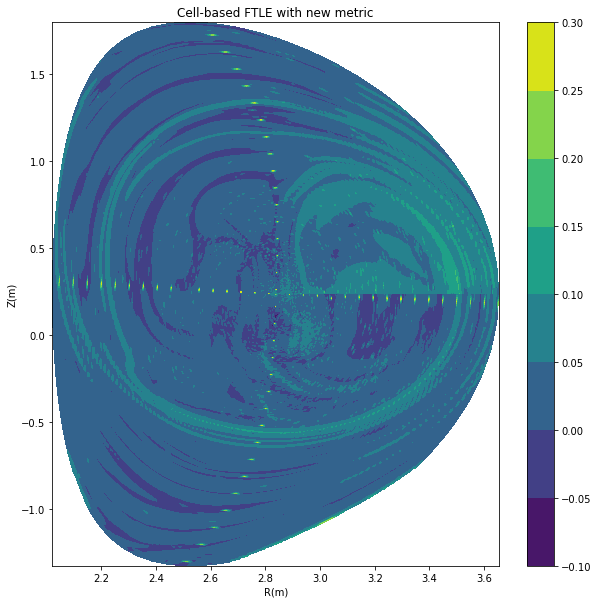

In [142]:
plt.figure(figsize=(10,10))
plt.title("Cell-based FTLE with new metric")
plt.contourf(xsn7,zsn7,np.swapaxes(LE7,0,1))
plt.xlabel('R(m)')
plt.ylabel('Z(m)')
plt.colorbar()
plt.show()

## Connection Length for x=0.5 boundary

In [126]:
reload(cnc)

<module 'connection_length' from '/turquoise/users/giannis_kx/python_pixie/connection_length.py'>

In [127]:
cn_path7 = "/net/scratch3/giannis_kx/FTLE/11_t365/conn_x/"

In [128]:
xs7,zs7,conn7 = cnc.read_connection_lengths(cn_path7,512)

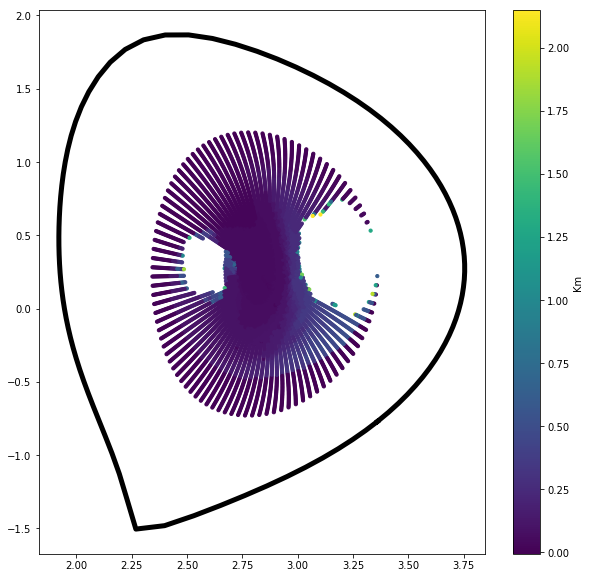

In [129]:
plt.figure(figsize=(10,10))
plt.scatter(xs7,zs7,c=[(c*norm)/1000 for c in conn7],s=10)
cbar = plt.colorbar()
cbar.ax.set_ylabel("Km")
plt.plot(xbnd,zbnd,'k-',linewidth=5)
plt.show()

In [130]:
len(xs7)

8423

/usr/projects/hpcsoft/toss3/common/anaconda/5.0.1-python-3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


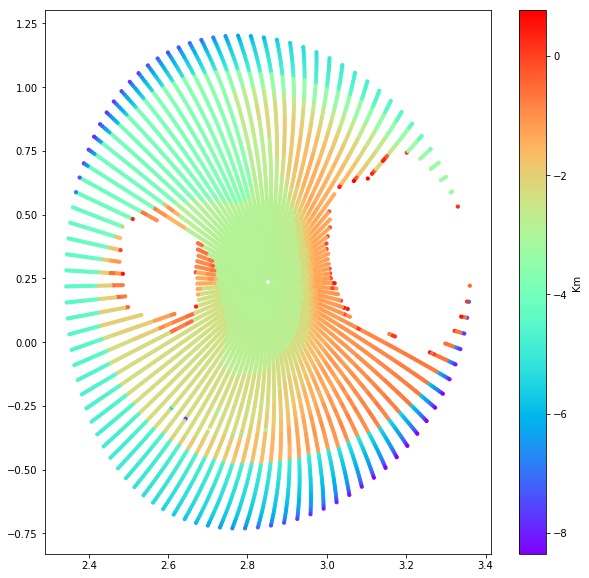

In [131]:
plt.figure(figsize=(10,10))
c=[(c*norm)/1000 for c in conn7]
plt.scatter(xs7,zs7,c=np.log(c),s=10,cmap="rainbow")
cbar = plt.colorbar()
cbar.ax.set_ylabel("Km")
#plt.plot(xbnd,zbnd,'k-',linewidth=5)
plt.show()

## Connection Lengths with x=0.6 (t=365)

In [200]:
reload(cnc)

<module 'connection_length' from '/turquoise/users/giannis_kx/python_pixie/connection_length.py'>

In [213]:
cn_path8 = "/net/scratch3/giannis_kx/FTLE/11_t365/conn_x0.6/"

In [214]:
xs8,zs8,conn8 = cnc.read_connection_lengths(cn_path8,64)

### Number of Initial Conditions that terminate with smax=1000

In [215]:
len(xs8)

4356

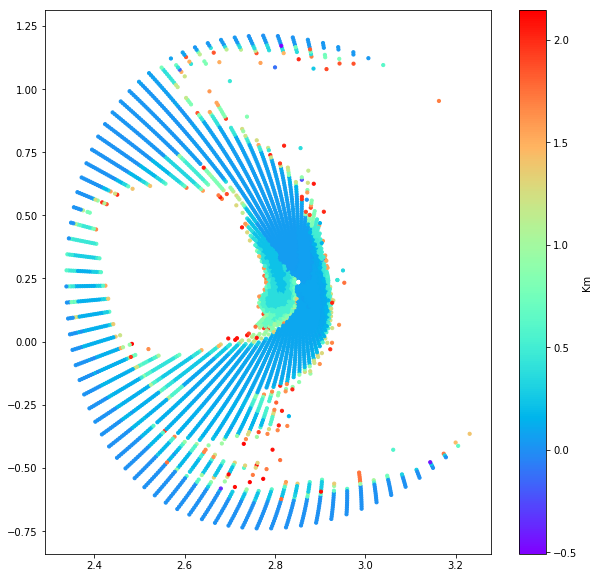

In [216]:
plt.figure(figsize=(10,10))
c=[(c*norm)/1000 for c in conn8]
plt.scatter(xs8,zs8,c=c,s=10,cmap="rainbow")
cbar = plt.colorbar()
cbar.ax.set_ylabel("Km")
#plt.plot(xbnd,zbnd,'k-',linewidth=5)
plt.show()

## Longer limit at x=0.6

In [206]:
reload(cnc)

<module 'connection_length' from '/turquoise/users/giannis_kx/python_pixie/connection_length.py'>

In [208]:
cn_path9 = "/net/scratch3/giannis_kx/FTLE/11_t365/conn_x0.6_long/"

In [209]:
xs9,zs9,conn9 = cnc.read_connection_lengths(cn_path9,64)

### Number of Initial conditions that terminate with smax=10000

In [210]:
len(xs9)

5537

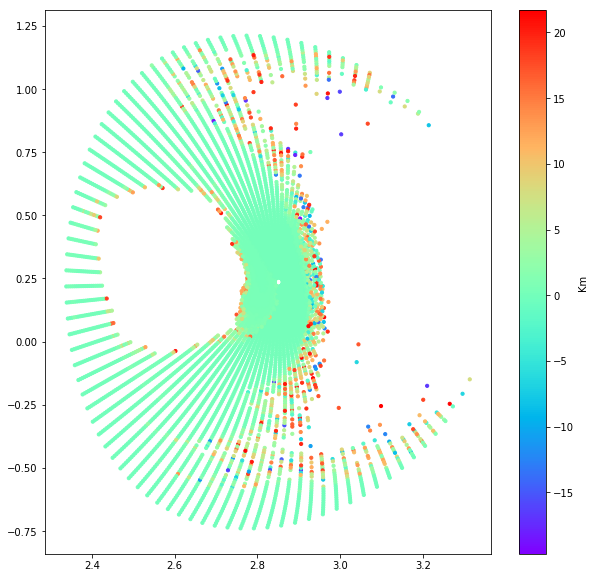

In [212]:
plt.figure(figsize=(10,10))
c=[(c*norm)/1000 for c in conn9]
plt.scatter(xs9,zs9,c=c,s=10,cmap="rainbow")
cbar = plt.colorbar()
cbar.ax.set_ylabel("Km")
#plt.plot(xbnd,zbnd,'k-',linewidth=5)
plt.show()

Slightly more initial conditions terminate when smax is changed an order of magnitude. 

## Luis' test

In [217]:
reload(cnc)

<module 'connection_length' from '/turquoise/users/giannis_kx/python_pixie/connection_length.py'>

In [218]:
cn_path10 = "/net/scratch3/giannis_kx/FTLE/11_t365/conlen/"

In [219]:
xs10,zs10,conn10 = cnc.read_connection_lengths(cn_path10,8)

In [220]:
len(xs10)

2162

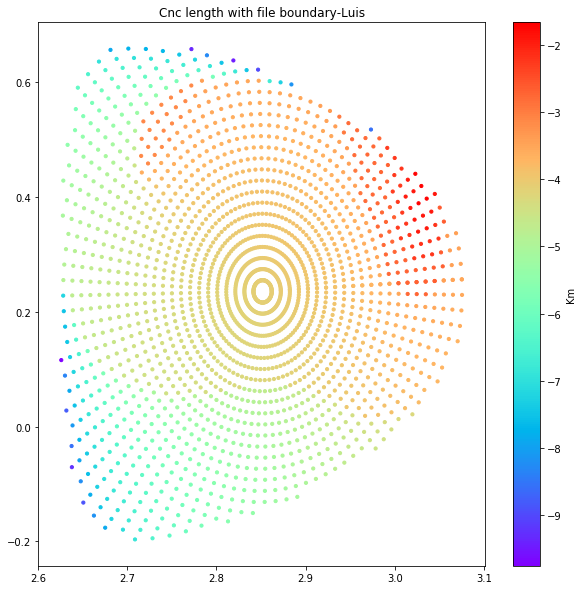

In [227]:
plt.figure(figsize=(10,10))
plt.title("Cnc length with file boundary-Luis")
c=[(c*norm)/1000 for c in conn10]
plt.scatter(xs10,zs10,c=np.log(c),s=10,cmap="rainbow")
cbar = plt.colorbar()
cbar.ax.set_ylabel("Km")
#plt.plot(xbnd,zbnd,'k-',linewidth=5)
plt.show()

## New test

In [229]:
cn_path11 = "/net/scratch3/giannis_kx/FTLE/11_t365/conn_nbdry2/"

In [234]:
xs11,zs11,conn11 = cnc.read_connection_lengths(cn_path11,512)

In [231]:
len(xs11)

2074

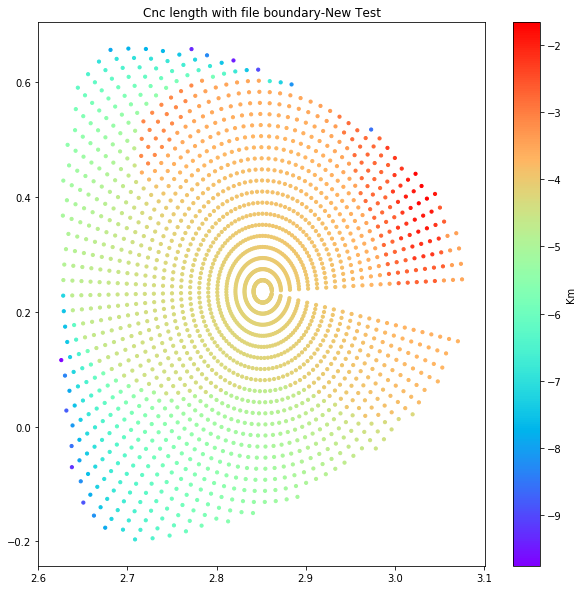

In [232]:
plt.figure(figsize=(10,10))
plt.title("Cnc length with file boundary-New Test")
c=[(c*norm)/1000 for c in conn11]
plt.scatter(xs11,zs11,c=np.log(c),s=10,cmap="rainbow")
cbar = plt.colorbar()
cbar.ax.set_ylabel("Km")
#plt.plot(xbnd,zbnd,'k-',linewidth=5)
plt.show()

## New test with fewer proc's

In [156]:
cn_path12 = "/net/scratch3/giannis_kx/FTLE/11_t365/conn_nbdry2/"

In [157]:
xs12,zs12,conn12 = cnc.read_connection_lengths(cn_path12,64)

In [158]:
len(xs12)

2162

In [ ]:
plt.figure(figsize=(10,10))
plt.title("Cnc length with file boundary-New Test")
c=[(c*norm)/1000 for c in conn11]
plt.scatter(xs12,zs11,c=np.log(c),s=10,cmap="rainbow")
cbar = plt.colorbar()
cbar.ax.set_ylabel("Km")
#plt.plot(xbnd,zbnd,'k-',linewidth=5)
plt.show()

## Connection Length of Separatrix points at r=0.98 boundary (t=365)

In [3]:
cn_path13 = "/net/scratch3/giannis_kx/FTLE/11_t365/conn_xic/"

In [4]:
xs13,zs13,conn13 = cnc.read_connection_lengths(cn_path13,64)

In [5]:
len(xs13)

79

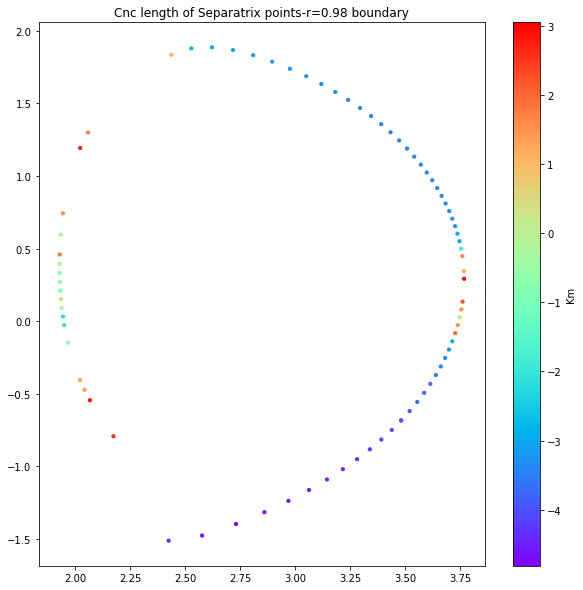

In [6]:
plt.figure(figsize=(10,10))
plt.title("Cnc length of Separatrix points-r=0.98 boundary")
c=[(c*norm)/1000 for c in conn13]
plt.scatter(xs13,zs13,c=np.log(c),s=10,cmap="rainbow")
cbar = plt.colorbar()
cbar.ax.set_ylabel("Km")
plt.show()